## Л.Р. 2
***Альперович Вадим, Седунов Илья***

In [200]:
from Algorithms import JohnsonSP as jsp
from Algorithms import FloydSP as fsp
from Algorithms import SeidelSP as ssp
from Scripts import StressTest as st
from Scripts import GraphGenerator as gg
from importlib import reload
import networkx as nx
import pandas as pd

В файле ***Scripts/GraphGenerator.py*** представлен класс, в котором мы реализовали несколько версий генераторов графов: generate_weighted_graph, generate_pseudo_real_graph

Maximum Edges 28.0
Probability to make an edge 0.5714285714285714
Edges 16
Connectivity True


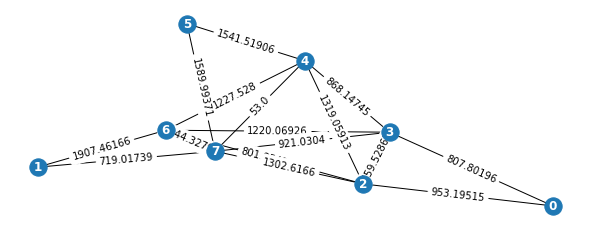

In [4]:
from Scripts import GraphGenerator as gg
n_nodes = 8
m_edges = 16
generator = gg.GraphGenerator(max_nodes=n_nodes,max_edges=m_edges)
G = generator.generate_pseudo_real_graph()
generator.draw_grapgh()

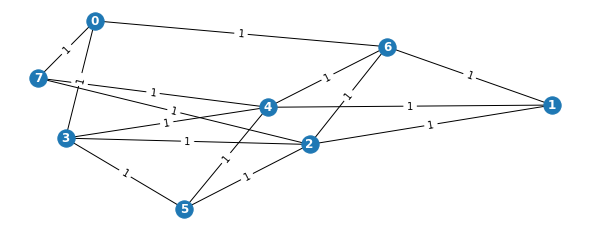

In [5]:
G = generator.generate_weighted_graph(w_range=(1,1), verbose = False)
generator.draw_grapgh()

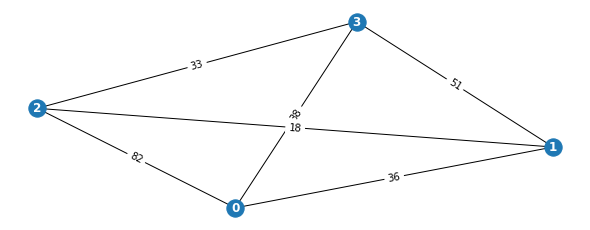

In [174]:
G = generator.generate_weighted_graph(verbose = False)
generator.draw_grapgh()

Пример работы алгоритмов на примитивных графах.

Maximum Edges 6.0
Probability to make an edge 1.0
Edges 6
Connectivity True


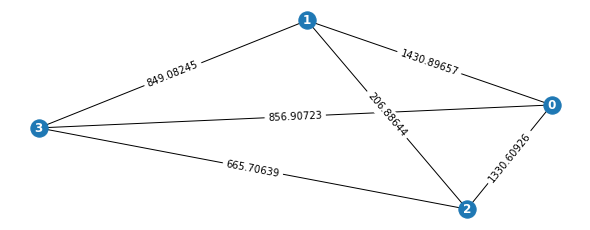

In [198]:
jsp = reload(jsp)
st = reload(st)

generator = gg.GraphGenerator(max_nodes=4, max_edges=6)
G = generator.generate_pseudo_real_graph(w_range=(1,1), verbose = True)
generator.draw_grapgh()

johnson_algorithm = jsp.JohnsonSP(G)
floyd_algorithm = fsp.FloydSP(G)

pred, floyd_dist = floyd_algorithm.floyd_predecessor_and_distance()
floyd_shortest_paths = floyd_algorithm.get_path_from_predcessor(pred)

johnsons_shortest_paths = johnson_algorithm.get_path_by_dijkstra()

Алгоритмы Флойда и Джонсона возвращают одинаковые словари кратчайших путей

In [197]:
floyd_shortest_paths == johnsons_shortest_paths

True

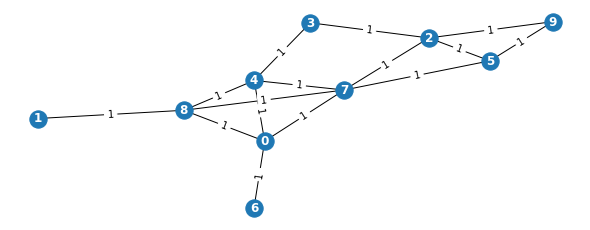

In [206]:
import numpy as np

# result of floyd alg (floyd_dist) to np.array
# for comparing with result of seidel algorithm
def dist_to_array(dist):
    N = len(dist)
    shortest_path_array = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            shortest_path_array[i][j] = dist[i][j]
    return shortest_path_array

# create graph
generator = gg.GraphGenerator(max_nodes=10, max_edges=16)
G = generator.generate_weighted_graph(w_range=(1,1), verbose = False)
A = np.array(nx.to_numpy_array(G))
generator.draw_grapgh()

# initialize classes
seidel = ssp.SeidelSP()
floyd_algorithm = fsp.FloydSP(G)

pred, floyd_dist = floyd_algorithm.floyd_predecessor_and_distance()
floyd_shortest_paths = floyd_algorithm.get_path_from_predcessor(pred)

seidel_dist_matrix = seidel.get_distance_matrix(A)

Алгоритмы возвращают одинаковые матрицы дистанций

In [208]:
np.array_equal(seidel_dist_matrix, dist_to_array(floyd_dist))

True

Результат работы стресс-тестов для алгоритмов Сейделя и Флойда.В результате работы теста 
на каждой итерации генерируются графы с параметрами $max\_nodes=100, max\_edges=600$ и сравнивается результат работы алгоритмов как представленно на примерах выше, реализация ***Scripts/StressTest.py - run_seidel_floyd_test(...)***

In [180]:
st = reload(st)
stress_tests = st.StressTest(verbose = False)
stress_tests.run_seidel_floyd_test(number_of_iterations=10000, max_nodes=100, max_edges=600)

| |                        #                       | 9999 Elapsed Time: 1:54:50

{'error_graphs': [],
 'seidel': datetime.timedelta(0, 0, 261031),
 'floyd': datetime.timedelta(0, 0, 406174)}

Результат работы стресс-тестов для алгоритмов Джонсона и Флойда.В результате работы теста на каждой итерации генерируются графы с параметрами  $max\_nodes=100, max\_edges=600$  и сравнивается результат работы алгоритмов как представленно на примерах выше, реализация ***Scripts/StressTest.py - run_johnsons_floyd_test(...)***

In [181]:
st = reload(st)
stress_tests_ = st.StressTest(verbose = False)
stress_tests_.run_johnsons_floyd_test(number_of_iterations=10000, max_nodes=100, max_edges=600)

| |                                #               | 9999 Elapsed Time: 3:23:15

{'error_graphs': [],
 'johnson': datetime.timedelta(0, 0, 440395),
 'floyd': datetime.timedelta(0, 0, 701410)}

Результат работы стресс тестов - 0 ошибок в обоих случаях (список графов, в которых произошла ошибка $error\_graphs$ - пуст)

In [144]:
from matplotlib import pyplot as plt
def draw(stat, c):
    plt.figure(figsize=(8,10))
    plt.title('m = {}*n'.format(c))
    plt.grid()
    line1, = plt.plot(stat.T.index, stat.T['seidel'], 'go-', label = 'seidel')
    line2, = plt.plot(stat.T.index, stat.T['floyd'], 'ro-', label = 'floyd')
    line3, = plt.plot(stat.T.index, stat.T['johnson'], 'bo-', label = 'johnson')
    plt.xlabel('nodes')
    plt.ylabel('time')
    plt.legend(handles=[line1, line2, line3])

In [142]:
import progressbar

numb_of_nodes = [50, 100, 150, 200, 250, 300, 350, 400, 450]
coefficents = [4, 5, 6]
info_stat = []
bar = progressbar.ProgressBar(max_value=progressbar.UnknownLength)

for c in coefficents:
    stat = pd.DataFrame(index=['seidel', 'johnson', 'floyd'], columns=numb_of_nodes)
    for i, n in enumerate(numb_of_nodes):
        bar.update(i)

        stress_tests = st.StressTest(verbose = False)
        ret_struct = stress_tests.run_seidel_floyd_test(number_of_iterations=1, max_nodes=n, max_edges=c*n)

        stress_tests_ = st.StressTest(verbose = False)
        ret_struct_ = stress_tests_.run_johnsons_floyd_test(number_of_iterations=1, max_nodes=n, max_edges=c*n)

        stat[stat.columns[i]] = [ret_struct['seidel'].total_seconds(), 
                                 ret_struct_['johnson'].total_seconds(), 
                                 ret_struct_['floyd'].total_seconds()]
    info_stat.append(stat)
    #draw(stat, c)

/ |#                                                  | 0 Elapsed Time: 0:00:00

Запускаем 

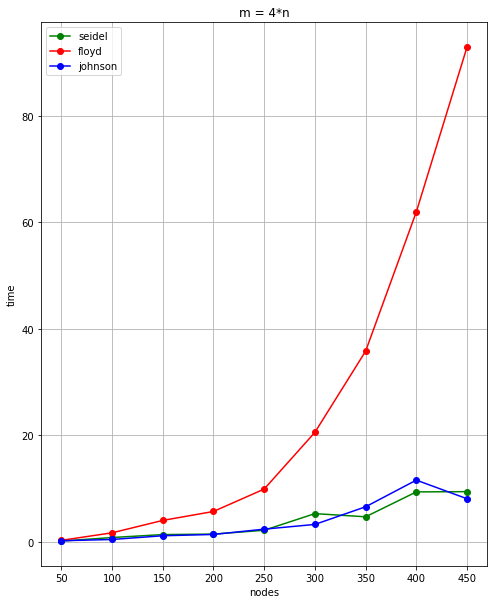

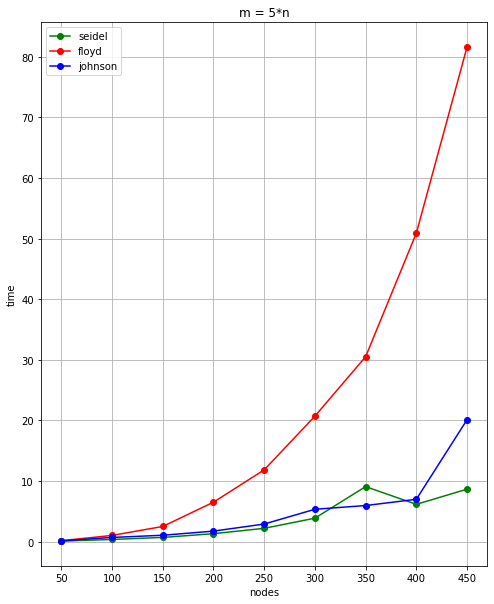

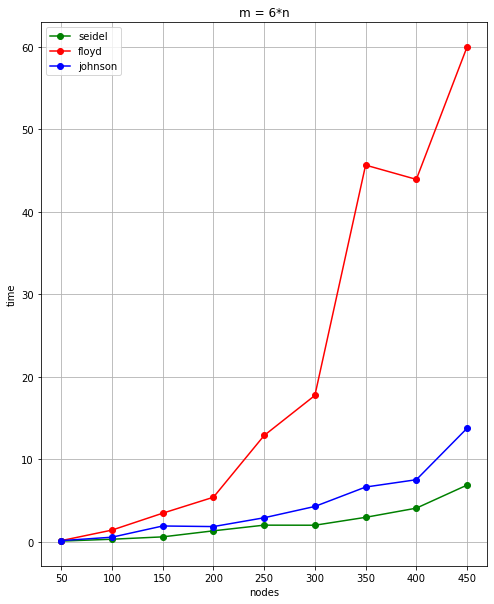

In [145]:
for i, stat in enumerate(info_stat):
    draw(stat, coefficents[i])

In [151]:
info_stat[0]

,50,100,150,200,250,300,350,400,450
seidel,0.122120,0.791320,1.343015,1.434861,2.155323,5.280746,4.684256,9.358407,9.408729
johnson,0.186200,0.424236,1.124484,1.368583,2.362414,3.252083,6.564401,11.573311,8.070699
floyd,0.261279,1.671437,4.002094,5.685436,9.886036,20.540489,35.781074,61.952685,92.928665
